===> Loading entire datasets


/Users/nabeelnauman/Documents/OMSCS/Big-Data-GaTech-Assignments/homework5/code/mymodels.py:115: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight)
/Users/nabeelnauman/Documents/OMSCS/Big-Data-GaTech-Assignments/homework5/code/mymodels.py:126: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc2.weight)


Epoch: [0][0/83]	Time 0.126 (0.126)	Data 0.009 (0.009)	Loss 0.6755 (0.6755)	Accuracy 65.000 (65.000)
Epoch: [0][10/83]	Time 0.020 (0.029)	Data 0.002 (0.003)	Loss 0.6610 (0.6769)	Accuracy 65.000 (60.000)
Epoch: [0][20/83]	Time 0.017 (0.025)	Data 0.002 (0.003)	Loss 0.6536 (0.6728)	Accuracy 65.000 (60.667)
Epoch: [0][30/83]	Time 0.036 (0.023)	Data 0.008 (0.003)	Loss 0.6822 (0.6725)	Accuracy 57.000 (60.516)
Epoch: [0][40/83]	Time 0.066 (0.024)	Data 0.018 (0.003)	Loss 0.6489 (0.6679)	Accuracy 65.000 (61.439)
Epoch: [0][50/83]	Time 0.026 (0.023)	Data 0.003 (0.003)	Loss 0.6834 (0.6680)	Accuracy 57.000 (61.333)
Epoch: [0][60/83]	Time 0.024 (0.022)	Data 0.003 (0.003)	Loss 0.7151 (0.6670)	Accuracy 53.000 (61.557)
Epoch: [0][70/83]	Time 0.019 (0.022)	Data 0.003 (0.003)	Loss 0.6801 (0.6653)	Accuracy 59.000 (61.845)
Epoch: [0][80/83]	Time 0.020 (0.023)	Data 0.003 (0.003)	Loss 0.6466 (0.6644)	Accuracy 65.000 (61.963)
Test: [0/12]	Time 0.004 (0.004)	Loss 0.6954 (0.6954)	Accuracy 56.000 (56.000)
Test:

Epoch: [7][70/83]	Time 0.017 (0.021)	Data 0.002 (0.003)	Loss 0.5178 (0.5166)	Accuracy 75.000 (74.915)
Epoch: [7][80/83]	Time 0.020 (0.020)	Data 0.002 (0.003)	Loss 0.4370 (0.5146)	Accuracy 78.000 (74.938)
Test: [0/12]	Time 0.006 (0.006)	Loss 0.5384 (0.5384)	Accuracy 76.000 (76.000)
Test: [10/12]	Time 0.005 (0.006)	Loss 0.4837 (0.5144)	Accuracy 73.000 (73.091)
Epoch: [8][0/83]	Time 0.073 (0.073)	Data 0.018 (0.018)	Loss 0.4859 (0.4859)	Accuracy 78.000 (78.000)
Epoch: [8][10/83]	Time 0.022 (0.027)	Data 0.003 (0.005)	Loss 0.4784 (0.5113)	Accuracy 75.000 (74.636)
Epoch: [8][20/83]	Time 0.016 (0.022)	Data 0.002 (0.004)	Loss 0.4720 (0.4828)	Accuracy 71.000 (75.762)
Epoch: [8][30/83]	Time 0.015 (0.022)	Data 0.002 (0.004)	Loss 0.5313 (0.4797)	Accuracy 75.000 (76.097)
Epoch: [8][40/83]	Time 0.017 (0.021)	Data 0.002 (0.003)	Loss 0.4697 (0.4898)	Accuracy 76.000 (75.829)
Epoch: [8][50/83]	Time 0.019 (0.022)	Data 0.002 (0.003)	Loss 0.5143 (0.4867)	Accuracy 73.000 (75.706)
Epoch: [8][60/83]	Time 0.015

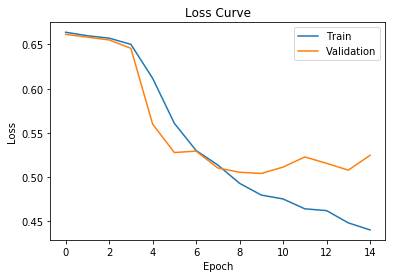

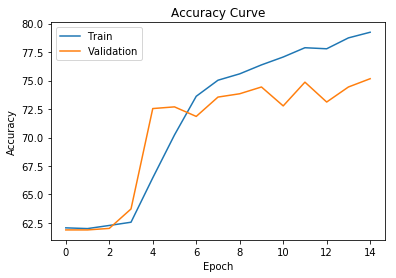

Test: [0/12]	Time 0.005 (0.005)	Loss 0.5798 (0.5798)	Accuracy 73.000 (73.000)
Test: [10/12]	Time 0.004 (0.005)	Loss 0.4883 (0.5336)	Accuracy 76.000 (74.818)


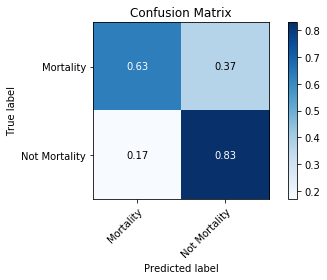

In [1]:
import os
import pickle

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

from utils import train, evaluate, make_kaggle_submission
from plots import plot_learning_curves, plot_confusion_matrix
from mydatasets import calculate_num_features, VisitSequenceWithLabelDataset, visit_collate_fn
from mymodels import MyVariableRNN

torch.manual_seed(0)
if torch.cuda.is_available():
	torch.cuda.manual_seed(0)

# Set a correct path to the data files that you preprocessed
PATH_TRAIN_SEQS = "../data/mortality/processed/mortality.seqs.train"
PATH_TRAIN_LABELS = "../data/mortality/processed/mortality.labels.train"
PATH_VALID_SEQS = "../data/mortality/processed/mortality.seqs.validation"
PATH_VALID_LABELS = "../data/mortality/processed/mortality.labels.validation"
PATH_TEST_SEQS = "../data/mortality/processed/mortality.seqs.test"
PATH_TEST_LABELS = "../data/mortality/processed/mortality.labels.test"
PATH_TEST_IDS = "../data/mortality/processed/mortality.ids.test"
PATH_OUTPUT = "../output/mortality/"

NUM_EPOCHS = 15
BATCH_SIZE = 64
USE_CUDA = False  # Set 'True' if you want to use GPU
NUM_WORKERS = 0

# Data loading
print('===> Loading entire datasets')
train_seqs = pickle.load(open(PATH_TRAIN_SEQS, 'rb'))
train_labels = pickle.load(open(PATH_TRAIN_LABELS, 'rb'))
valid_seqs = pickle.load(open(PATH_VALID_SEQS, 'rb'))
valid_labels = pickle.load(open(PATH_VALID_LABELS, 'rb'))
test_seqs = pickle.load(open(PATH_TEST_SEQS, 'rb'))
test_labels = pickle.load(open(PATH_TEST_LABELS, 'rb'))

num_features = calculate_num_features(train_seqs)

train_dataset = VisitSequenceWithLabelDataset(train_seqs, train_labels, num_features)
valid_dataset = VisitSequenceWithLabelDataset(valid_seqs, valid_labels, num_features)
test_dataset = VisitSequenceWithLabelDataset(test_seqs, test_labels, num_features)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=visit_collate_fn, num_workers=NUM_WORKERS)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=visit_collate_fn, num_workers=NUM_WORKERS)
# batch_size for the test set should be 1 to avoid sorting each mini-batch which breaks the connection with patient IDs
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, collate_fn=visit_collate_fn, num_workers=NUM_WORKERS)

model = MyVariableRNN(num_features)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adadelta(model.parameters())

device = torch.device("cuda" if torch.cuda.is_available() and USE_CUDA else "cpu")
model.to(device)
criterion.to(device)

best_val_acc = 0.0
train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []
for epoch in range(NUM_EPOCHS):
	train_loss, train_accuracy = train(model, device, train_loader, criterion, optimizer, epoch)
	valid_loss, valid_accuracy, valid_results = evaluate(model, device, valid_loader, criterion)

	train_losses.append(train_loss)
	valid_losses.append(valid_loss)

	train_accuracies.append(train_accuracy)
	valid_accuracies.append(valid_accuracy)

	is_best = valid_accuracy > best_val_acc  # let's keep the model that has the best accuracy, but you can also use another metric.
	if is_best:
		best_val_acc = valid_accuracy
		torch.save(model, os.path.join(PATH_OUTPUT, "MyVariableRNN.pth"))

best_model = torch.load(os.path.join(PATH_OUTPUT, "MyVariableRNN.pth"))
# TODO: For your report, try to make plots similar to those in the previous task.
# TODO: You may use the validation set in case you cannot use the test set.

plot_learning_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)
test_loss, test_accuracy, test_results = evaluate(best_model, device, valid_loader, criterion)
class_names = ['Mortality', 'Not Mortality']
plot_confusion_matrix(test_results, class_names)

In [4]:
PATH_VALID_SEQS = os.path.join("../data/mortality/processed/mortality.seqs.validation")
PATH_VALID_LABELS = os.path.join("../data/mortality/processed/mortality.labels.validation")
valid_seqs = pickle.load(open(PATH_VALID_SEQS, 'rb'))
valid_labels = pickle.load(open(PATH_VALID_LABELS, 'rb'))

In [6]:
len(valid_seqs)

754